**Название исследования:** анализ данные приемной кампании 2022 года

**Цель:** помочь университету правильно выстроить стратегию работы с абитуриентами и стать настоящим полюсом притяжения талантов

**План исследования:** проанализировать общую информацию о приемной кампании, составить портрет абитуриента. На каждом этапе сделать промежуточный вывод. В конце исследования сделать общий вывод.

## 1 часть. Общая информация о приемной кампании.

In [1]:
#испортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
from collections import Counter

In [2]:
#выведем установленные пакеты
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
#загрузим данные
#проводим их первичное исследование методами (head(), info(), shape)
df = pd.read_csv('basa.csv')
df.head()

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Согласие на зачисление,Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
1,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
2,154-702-875 69,30.07.2022,323,0,Да,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",30.07.2022 11:41:43
3,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
4,165-530-013 41,04.07.2022,301,0,Нет,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29470 entries, 0 to 29469
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Уникальный код                         29470 non-null  object
 1   Дата подачи заявления                  29470 non-null  object
 2   Сумма баллов                           29470 non-null  int64 
 3   Сумма баллов за инд.дост.(конкурсные)  29470 non-null  int64 
 4   Согласие на зачисление                 29470 non-null  object
 5   Пол                                    29470 non-null  object
 6   Дата рождения                          29470 non-null  object
 7   Гражданство                            29453 non-null  object
 8   Основание поступления                  29470 non-null  object
 9   Категория приема                       29470 non-null  object
 10  Форма обучения                         29470 non-null  object
 11  Уровень подгото

In [5]:
#проверим данные на дубликаты, удалим их
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(29435, 20)

In [6]:
#проверим данные на пропуски
df.isnull().sum()

Уникальный код                               0
Дата подачи заявления                        0
Сумма баллов                                 0
Сумма баллов за инд.дост.(конкурсные)        0
Согласие на зачисление                       0
Пол                                          0
Дата рождения                                0
Гражданство                                 17
Основание поступления                        0
Категория приема                             0
Форма обучения                               0
Уровень подготовки                           0
Направление\специальность                    0
Факультет                                    0
Регион по прописке                         443
Вид образования                              0
Год завершения                               0
Состояние                                    0
Доставка документов                          0
Дата согласия на зачисление              26558
dtype: int64

In [7]:
#проведем анализ имеющихся данных только для абитуриентов, которые подавали заявление на очную форму обучения
df1 = df[df['Форма обучения']=='очная']
df1

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Согласие на зачисление,Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
1,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
2,154-702-875 69,30.07.2022,323,0,Да,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",30.07.2022 11:41:43
3,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
4,165-530-013 41,04.07.2022,301,0,Нет,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29466,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29467,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29468,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN


In [8]:
#снова проверим на дубликаты
df1.duplicated().sum()

0

In [9]:
#дубликатов нет, но для гарантии проверить снова стоило
df1.shape

(27975, 20)

In [10]:
#опишем наши данные
df1.describe(include = "all")

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Согласие на зачисление,Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
count,27975,27975,27975.000000,27975.000000,27975,27975,27975,27958,27975,27975,27975,27975,27975,27975,27558,27975,27975.000000,27975,27975,2087
unique,5334,63,NaN,NaN,2,2,1233,23,3,2,1,2,24,6,117,3,NaN,4,4,2081
top,000096291,07.07.2022,NaN,NaN,Нет,Женский,31.05.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,архитектурный факультет,Санкт-Петербург г,Среднее общее,NaN,Подано,"Суперсервис ""Поступление в вуз онлайн""",08.07.2022 11:36:16
freq,33,1977,NaN,NaN,25888,14285,132,27503,20006,27667,27975,24574,5027,7336,10132,26478,NaN,22977,10431,2
mean,NaN,NaN,213.971153,0.659696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.688865,NaN,NaN,NaN
std,NaN,NaN,57.701245,1.701108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.951656,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN
25%,NaN,NaN,185.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN
50%,NaN,NaN,212.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN
75%,NaN,NaN,242.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN


In [11]:
#найдем дату начала приема документов
df1['Дата подачи заявления'].min()

'01.07.2022'

In [12]:
#найдем дату окончания приема документов
df1['Дата подачи заявления'].max()

'31.08.2022'

In [13]:
#найдем количество заявлений, в т.ч. по факультетам и направлениям подготовки
df1['Дата подачи заявления'].value_counts().sum()

27975

In [14]:
#найдем количество уникальных абитуриентов, среднее количество заявлений на одного абитуриента, медиану
word_counts1 = Counter()
word_counts1.update(df1['Уникальный код'])
st = word_counts1.most_common()
df1 = pd.DataFrame(st, columns = ['word', 'count'])
st

[('000096291', 33),
 ('190-622-343 54', 30),
 ('168-054-006 59', 26),
 ('000096124', 26),
 ('153-255-834 60', 23),
 ('195-817-608 21', 23),
 ('154-990-977 22', 22),
 ('157-715-060 76', 22),
 ('165-300-513 29', 22),
 ('164-477-273 94', 22),
 ('163-006-885 46', 22),
 ('166-024-847 63', 22),
 ('175-771-233 95', 22),
 ('170-313-894 45', 22),
 ('176-315-922 82', 22),
 ('166-421-992 83', 22),
 ('143-226-516 30', 21),
 ('158-764-911 21', 21),
 ('197-769-210 44', 21),
 ('165-925-688 16', 21),
 ('171-661-598 82', 21),
 ('190-820-937 78', 21),
 ('171-906-795 93', 21),
 ('155-415-179 58', 21),
 ('162-152-432 29', 21),
 ('171-742-165 61', 21),
 ('194-812-648 02', 21),
 ('190-750-673 82', 21),
 ('158-332-879 92', 21),
 ('190-904-370 73', 21),
 ('167-630-773 94', 21),
 ('165-889-968 61', 21),
 ('169-737-946 44', 20),
 ('174-908-293 04', 20),
 ('168-943-327 17', 20),
 ('150-535-355 37', 20),
 ('202-705-977 41', 20),
 ('168-436-765 12', 20),
 ('170-822-481 59', 20),
 ('168-285-281 06', 20),
 ('203-455

In [15]:
#округлим значения
round(df1.describe())

,count
count,5334.0
mean,5.0
std,4.0
min,1.0
25%,2.0
50%,4.0
75%,8.0
max,33.0


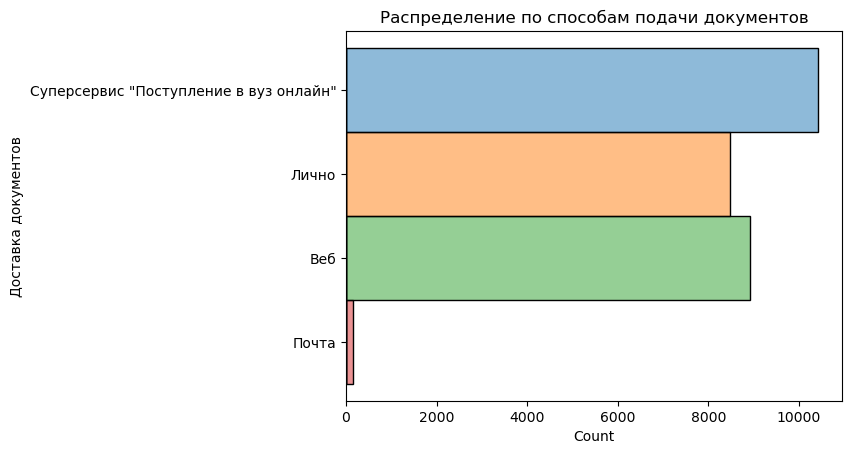

In [16]:
#построим распределение по способам подачи документов
sns.histplot(y = 'Доставка документов', hue = 'Доставка документов', data = df[df['Форма обучения'] == 'очная'], legend = False).set_title("Распределение по способам подачи документов");

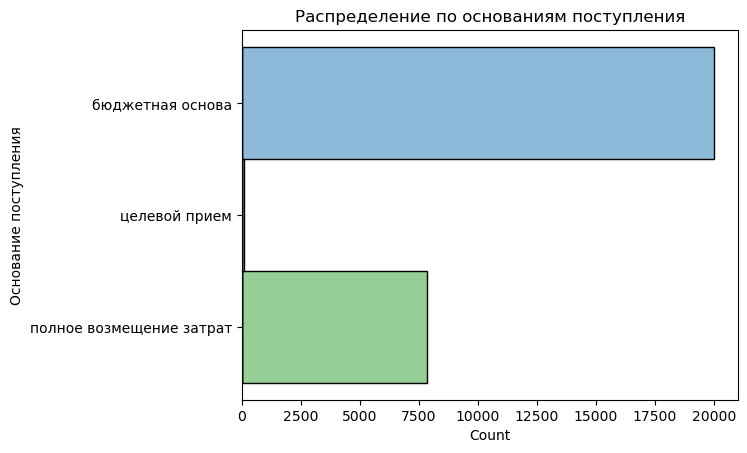

In [17]:
#построим распределение по основаниям поступления, уровням подготовки, образованию
sns.histplot(y = 'Основание поступления', hue = 'Основание поступления', data = df[df['Форма обучения'] == 'очная'], legend = False).set_title("Распределение по основаниям поступления");

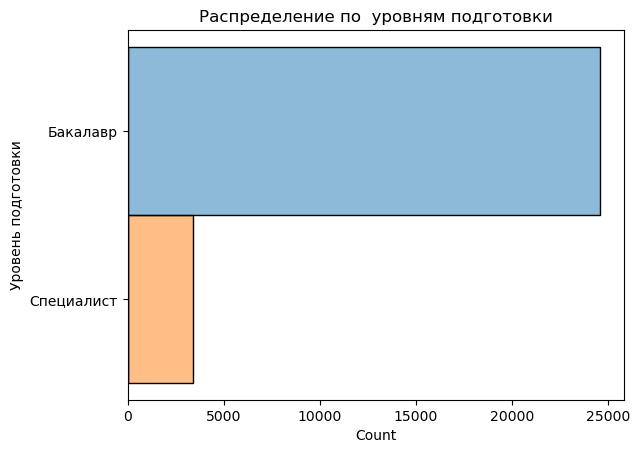

In [18]:
sns.histplot(y = 'Уровень подготовки', hue = 'Уровень подготовки', data = df[df['Форма обучения'] == 'очная'], legend = False).set_title("Распределение по  уровням подготовки");

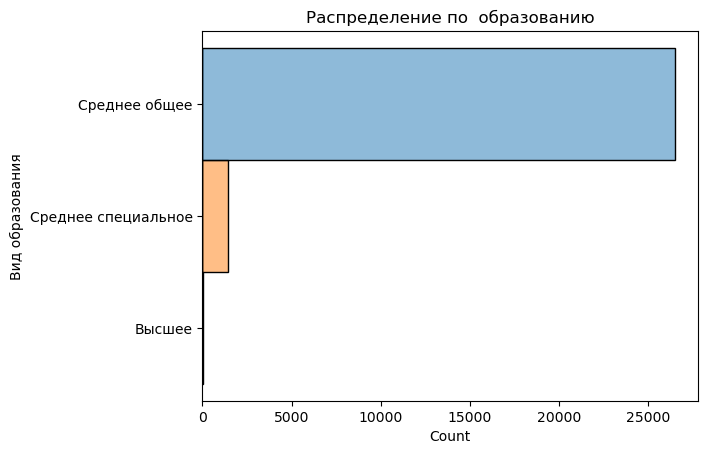

In [19]:
sns.histplot(y = 'Вид образования', hue = 'Вид образования', data = df[df['Форма обучения'] == 'очная'], legend = False).set_title("Распределение по  образованию");

C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\3564337152.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


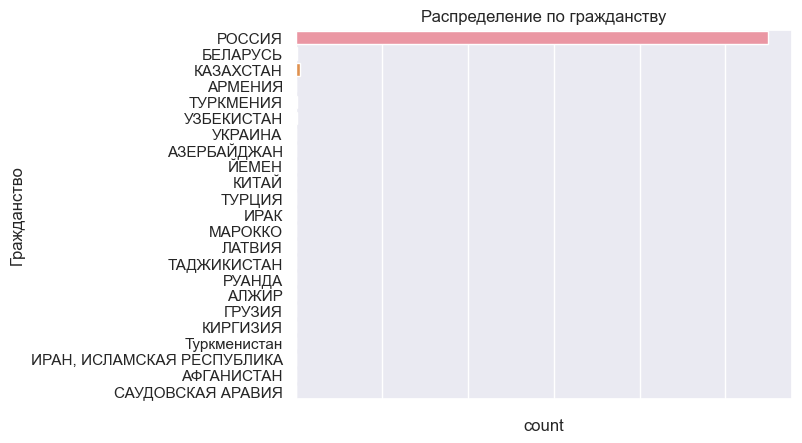

In [20]:
#построим распределение по регионам, гражданству
sns.set()
ax = sns.countplot(y = "Гражданство", data = df[df['Форма обучения'] == 'очная'])
ax.set_title('Распределение по гражданству')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\3385007164.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


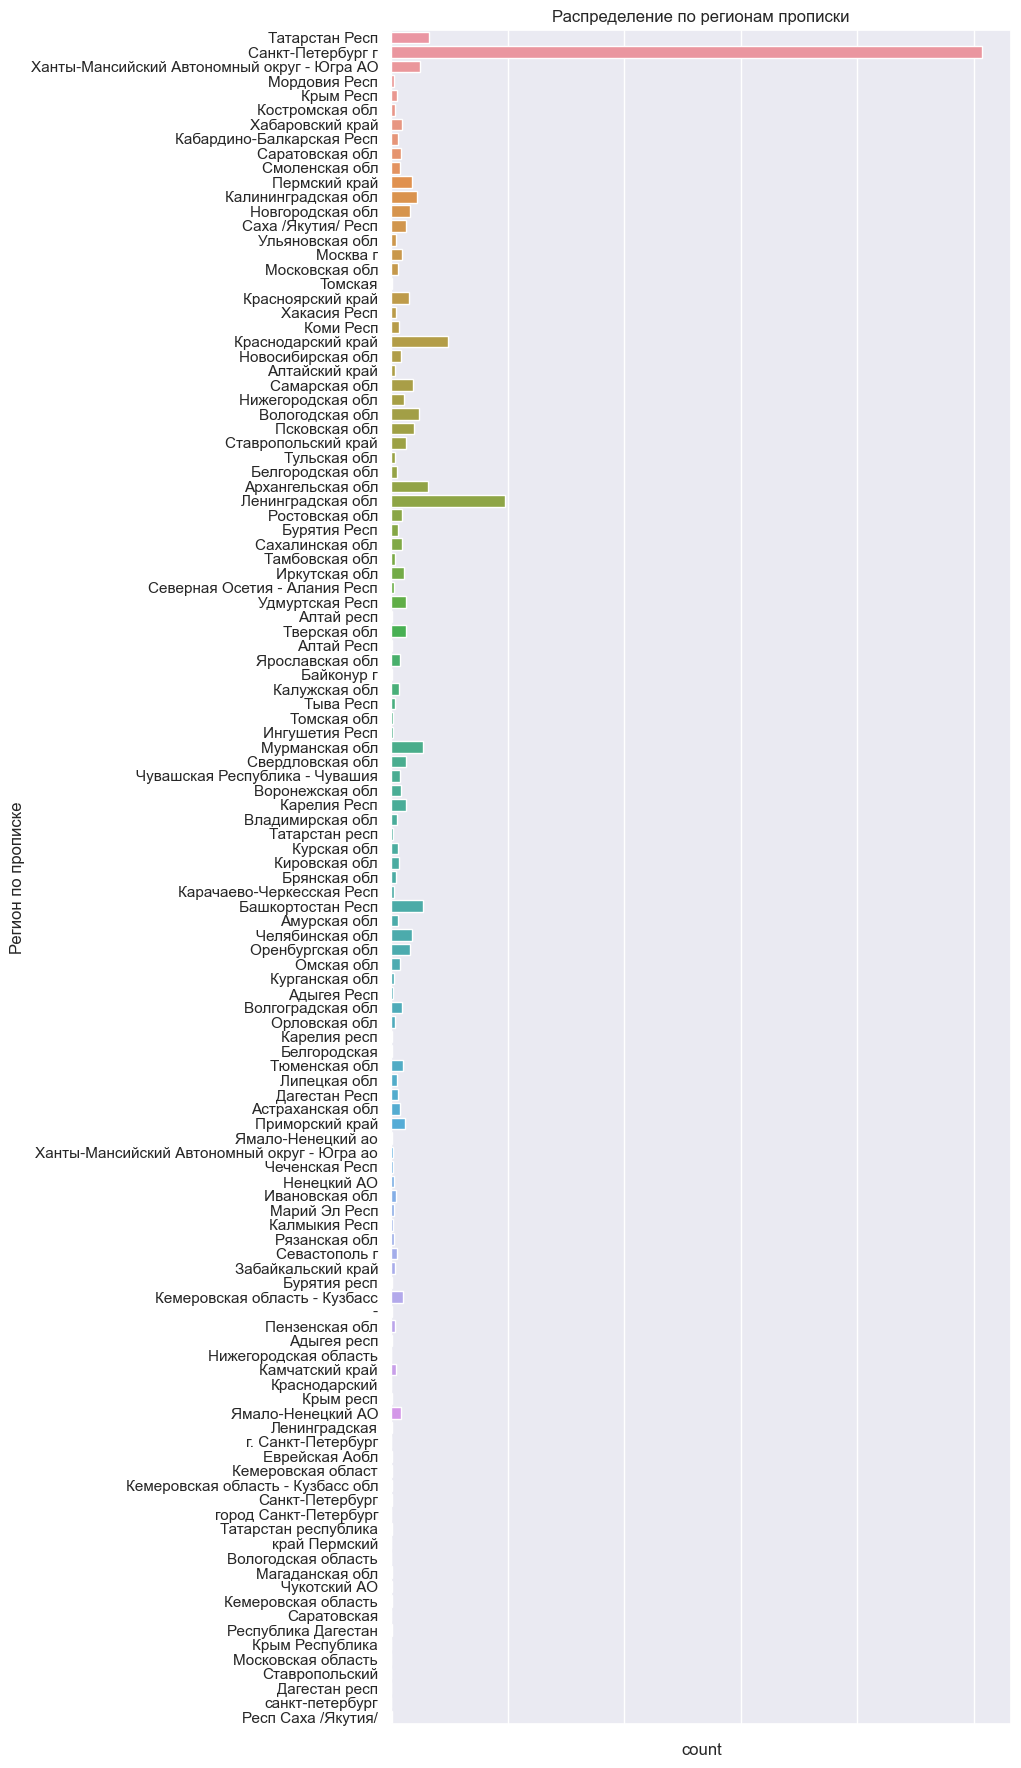

In [21]:
sns.set(rc={'figure.figsize':(8,22)})
ax = sns.countplot(y = "Регион по прописке", data = df[df['Форма обучения'] == 'очная'])
ax.set_title('Распределение по регионам прописки')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [22]:
#определим количество согласий по направлениям подготовки до момента публикации конкурсных списков
df['Дата согласия на зачисление']=pd.to_datetime(df['Дата согласия на зачисление']).dt.date
df['Дата согласия на зачисление'].dropna() 

2        2022-07-30
7        2022-07-25
9        2022-07-25
12       2022-07-27
16       2022-07-30
            ...    
29406    2022-04-08
29427    2022-01-08
29452    2022-08-07
29459    2022-08-07
29461    2022-06-22
Name: Дата согласия на зачисление, Length: 2877, dtype: object

In [23]:
len(df[df['Форма обучения'] == 'очная']['Дата согласия на зачисление'].dropna())

2087

In [24]:
date_before = dt.date(2022, 7, 27)
len(df[df['Дата согласия на зачисление'] < date_before])

1832

### Анализ имеющихся данных проводился только для абитуриентов, которые подавали заявление на **очную форму** обучения

● Дата начала и окончания приема документов  
Ответ: 01.07.2022, 31.08.2022

● Количество заявлений, в т.ч. по факультетам и направлениям подготовки  
Ответ: 27975

● Количество уникальных абитуриентов  
Ответ: 5334

● Количество заявлений на одного абитуриента, среднее, медиана (используйте результаты метода describe())

Ответ:

mean 5.0 (среднее знаечние)

std	4.0 (стандартное отклонение значения)

min	1.0 (минимальное значение)

25%	2.0 (первый квартиль, означающий, что 25% значений в столбце ниже этого значения)

50%	4.0 (медиана, означающая, что половина значений в столбце ниже этого значения)

75%	8.0 (третий квартиль, означающий, что 75% значений в столбце ниже этого значения)

max	33.0 (максимальное значение)

● Распределение по способам подачи документов  
Ответ: самым популярным способом подачи документов оказался "Суперсервис "Поступление в ВУЗ онлайн", чуть менее популярным - подача документов через личный кабинет на сайте университета. На третьем месте оказался способ, заключающийся в личной подаче документов. Самым непопулярным способом оказал подача посредством почты.

● Распределение по основаниям поступления, уровням подготовки, образованию  
Ответ: по основаниям поступления на первом месте - бюджетная основа, на втором - полное возмещение затрат, на последнем - целевой прием. По уровням подготовки специалистов во много раз меньше, чем бакалавров. По видам образования большинство абитуриентов имеют среднее образование, на втором месте идут абитуриенты со средним специальным образованием. И меньше всего абитуриентов с высшим.

● Распределение по регионам, гражданству  
Ответ: Преобладающее большинство студентов из Санкт-Петербурга и Ленинградской области, преобладающее гражданство - российское.


● Количество согласий по направлениям подготовки до момента публикации конкурсных списков  
1832

● ***Промежуточный вывод***

Большинство абитуриентов имеют российское гражданство, проживают в Санкт-Петербурге, подавали, в среднем по 5 заявлений, и были очень заинтересованы в поступлении, ВУЗ для них был в приоритете. Также большинство студентов хотят быть бакалаврами, имеют среднее образование и основание для поступления  - бюджет. Кроме того, большинство предпочло "Суперсервис" другим видам подачи заявления. 

##  2 часть. Портрет абитуриента.

In [25]:
#проведем анализ имеющихся данных только для абитуриентов, которые подавали заявление на очную форму обучения
df1 = df[df['Форма обучения']=='очная']
df1

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Согласие на зачисление,Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
1,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
2,154-702-875 69,30.07.2022,323,0,Да,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30
3,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
4,165-530-013 41,04.07.2022,301,0,Нет,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT
29466,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT
29467,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT
29468,170-149-613 49,22.07.2022,0,0,Нет,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT


In [26]:
#определим количество уникальных абитуриентов
df2 = df1.drop_duplicates(subset=['Уникальный код'])
df2

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Согласие на зачисление,Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,154-702-875 69,30.07.2022,323,0,Нет,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
4,165-530-013 41,04.07.2022,301,0,Нет,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaT
8,200-853-207 15,22.06.2022,295,0,Нет,Женский,31.12.2003,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург г,Среднее общее,2021,Подано,Лично,NaT
12,000096659,20.07.2022,288,0,Да,Мужской,23.01.2000,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Ханты-Мансийский Автономный округ - Югра АО,Среднее специальное,2020,Зачислен,Веб,2022-07-27
14,153-354-557 60,30.07.2022,288,5,Нет,Женский,05.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Мордовия Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29447,000074598,12.07.2022,0,0,Нет,Мужской,26.09.1998,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,20.03.01 Техносферная безопасность,автомобильно-дорожный факультет,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT
29453,141-041-541 96,16.07.2022,0,0,Нет,Мужской,15.12.1987,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,38.03.02 Менеджмент,факультет экономики и управления,Санкт-Петербург г,Среднее общее,2005,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
29456,000102250,11.07.2022,0,0,Нет,Мужской,14.01.2005,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT
29462,192-932-664 04,29.07.2022,0,0,Нет,Мужской,24.06.2002,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Мурманская обл,Среднее специальное,2021,Подано,Лично,NaT


In [27]:
#определим количество девушек и парней, поступивших на бюджет и на контракт
fb=df2[df2['Основание поступления'] == 'бюджетная основа']['Пол'].value_counts()['Женский']
mb=df2[df2['Основание поступления'] == 'бюджетная основа']['Пол'].value_counts()['Мужской']
fp=df2[df2['Основание поступления'] == 'полное возмещение затрат']['Пол'].value_counts()['Женский']
mp=df2[df2['Основание поступления'] == 'полное возмещение затрат']['Пол'].value_counts()['Мужской']
print(f'женский пол на бюджет: {fb}, мужской пол на бюджет: {mb}')
print(f'женский пол на контракт: {fp}, мужской пол на контракт: {mp}')

женский пол на бюджет: 1922, мужской пол на бюджет: 1703
женский пол на контракт: 855, мужской пол на контракт: 802


In [28]:
#сменим тип данных 'Даты', для того чтобы у нас была бы возможность пользоваться функциями pandas, предназначенными для работы с датой
date_born=df2['Дата рождения']=pd.to_datetime(df2['Дата рождения']).dt.date
date_born

C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\428155431.py:2: UserWarning: Parsing '14.08.2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  date_born=df2['Дата рождения']=pd.to_datetime(df2['Дата рождения']).dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\428155431.py:2: UserWarning: Parsing '22.10.2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  date_born=df2['Дата рождения']=pd.to_datetime(df2['Дата рождения']).dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\428155431.py:2: UserWarning: Parsing '31.12.2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  date_born=df2['Дата рождения']=pd.to_datetime(df2['Дата рождения']).dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\428155431.py:2: UserWarning: Parsing '23.01.2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=Tru

0        2004-08-14
4        2004-10-22
8        2003-12-31
12       2000-01-23
14       2004-05-08
            ...    
29447    1998-09-26
29453    1987-12-15
29456    2005-01-14
29462    2002-06-24
29464    2000-07-25
Name: Дата рождения, Length: 5334, dtype: object

In [29]:
#определим средний возраст этих абитуриентов
def f(end):
    r = relativedelta(pd.to_datetime('now'), end) 
    return '{}'.format(r.years)

df2['Возраст'] = df2["Дата рождения"].apply(f)
df2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\2245222054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Возраст'] = df2["Дата рождения"].apply(f)


,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Согласие на зачисление,Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,...,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление,Возраст
0,154-702-875 69,30.07.2022,323,0,Нет,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,...,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,18
4,165-530-013 41,04.07.2022,301,0,Нет,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,...,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaT,18
8,200-853-207 15,22.06.2022,295,0,Нет,Женский,2003-12-31,РОССИЯ,бюджетная основа,Имеющие особое право,...,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург г,Среднее общее,2021,Подано,Лично,NaT,18
12,000096659,20.07.2022,288,0,Да,Мужской,2000-01-23,РОССИЯ,бюджетная основа,Имеющие особое право,...,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Ханты-Мансийский Автономный округ - Югра АО,Среднее специальное,2020,Зачислен,Веб,2022-07-27,22
14,153-354-557 60,30.07.2022,288,5,Нет,Женский,2004-05-08,РОССИЯ,бюджетная основа,Имеющие особое право,...,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Мордовия Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29447,000074598,12.07.2022,0,0,Нет,Мужской,1998-09-26,РОССИЯ,бюджетная основа,На общих основаниях,...,Бакалавр,20.03.01 Техносферная безопасность,автомобильно-дорожный факультет,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT,24
29453,141-041-541 96,16.07.2022,0,0,Нет,Мужской,1987-12-15,РОССИЯ,бюджетная основа,На общих основаниях,...,Бакалавр,38.03.02 Менеджмент,факультет экономики и управления,Санкт-Петербург г,Среднее общее,2005,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,34
29456,000102250,11.07.2022,0,0,Нет,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,...,Бакалавр,08.03.01 Строительство,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,17
29462,192-932-664 04,29.07.2022,0,0,Нет,Мужской,2002-06-24,РОССИЯ,полное возмещение затрат,На общих основаниях,...,Бакалавр,08.03.01 Строительство,строительный факультет,Мурманская обл,Среднее специальное,2021,Подано,Лично,NaT,20


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 29464
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Уникальный код                         5334 non-null   object
 1   Дата подачи заявления                  5334 non-null   object
 2   Сумма баллов                           5334 non-null   int64 
 3   Сумма баллов за инд.дост.(конкурсные)  5334 non-null   int64 
 4   Согласие на зачисление                 5334 non-null   object
 5   Пол                                    5334 non-null   object
 6   Дата рождения                          5334 non-null   object
 7   Гражданство                            5332 non-null   object
 8   Основание поступления                  5334 non-null   object
 9   Категория приема                       5334 non-null   object
 10  Форма обучения                         5334 non-null   object
 11  Уровень подготов

In [31]:
df2['Возраст'] = df2['Возраст'].astype(float)
df2.dtypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\3610995702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Возраст'] = df2['Возраст'].astype(float)


Уникальный код                            object
Дата подачи заявления                     object
Сумма баллов                               int64
Сумма баллов за инд.дост.(конкурсные)      int64
Согласие на зачисление                    object
Пол                                       object
Дата рождения                             object
Гражданство                               object
Основание поступления                     object
Категория приема                          object
Форма обучения                            object
Уровень подготовки                        object
Направление\специальность                 object
Факультет                                 object
Регион по прописке                        object
Вид образования                           object
Год завершения                             int64
Состояние                                 object
Доставка документов                       object
Дата согласия на зачисление               object
Возраст             

In [32]:
fb_old=round(df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Возраст'].mean())
mb_old=round(df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Возраст'].mean())
fp_old=round(df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Возраст'].mean())
mp_old=round(df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Возраст'].mean())
print(f'средний возраст на бюждет: женщин/девушек: {fb_old}, мужчин/парней: {mb_old}')
print(f'средний возраст на контракт: женщин/девушек: {fp_old}, мужчин/парней: {mp_old}')

средний возраст на бюждет: женщин/девушек: 18, мужчин/парней: 18
средний возраст на контракт: женщин/девушек: 18, мужчин/парней: 18


In [33]:
#определим уровень образования этих абитуриентов
fb_edu_s=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Вид образования'].value_counts()['Среднее общее']
fb_edu_c=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Вид образования'].value_counts()['Среднее специальное']

mb_edu_s=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Мужской')]['Вид образования'].value_counts()['Среднее общее']
mb_edu_c=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Мужской')]['Вид образования'].value_counts()['Среднее специальное']

fp_edu_s=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Вид образования'].value_counts()['Среднее общее']
fp_edu_c=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Вид образования'].value_counts()['Среднее специальное']

mp_edu_s=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Мужской')]['Вид образования'].value_counts()['Среднее общее']
mp_edu_c=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Мужской')]['Вид образования'].value_counts()['Среднее специальное']


print(f'после школы на бюджет пришли {fb_edu_s} девушек, после колледжа - {fb_edu_c} девушек')
print(f'после колледжа на бюджет пришли {mb_edu_s} парней, после колледжа - {mb_edu_c} парней')
print(f'после школы на контракт пришли {fp_edu_s} девушек, после колледжа - {fp_edu_c} девушек')
print(f'после школы на контракт пришли {mp_edu_s} парней, после колледжа - {mp_edu_c} парней')

после школы на бюджет пришли 1776 девушек, после колледжа - 146 девушек
после колледжа на бюджет пришли 1568 парней, после колледжа - 135 парней
после школы на контракт пришли 804 девушек, после колледжа - 45 девушек
после школы на контракт пришли 741 парней, после колледжа - 55 парней


In [34]:
print('пришло девушек  на бюджет после ВУЗа - ', fb-fb_edu_s-fb_edu_c)
print('пришло парней  на бюджет после ВУЗа - ', mb-mb_edu_s-mb_edu_c)
print('пришло девушек  на контракт после ВУЗа - ', fp-fp_edu_s-fp_edu_c)
print('пришло парней  на контракт после ВУЗа - ', mp-mp_edu_s-mp_edu_c)

пришло девушек  на бюджет после ВУЗа -  0
пришло парней  на бюджет после ВУЗа -  0
пришло девушек  на контракт после ВУЗа -  6
пришло парней  на контракт после ВУЗа -  6


In [35]:
#опрделим откуда эти студенты
fb_edu_ad=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Регион по прописке'].value_counts()
fb_edu_ad

Санкт-Петербург г                              493
Ленинградская обл                              108
Краснодарский край                              74
Татарстан Респ                                  59
Архангельская обл                               52
                                              ... 
Томская                                          1
Ямало-Ненецкий ао                                1
Ханты-Мансийский Автономный округ - Югра ао      1
Белгородская                                     1
Респ Саха /Якутия/                               1
Name: Регион по прописке, Length: 99, dtype: int64

In [36]:
mb_edu_ad=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Мужской')]['Регион по прописке'].value_counts()
mb_edu_ad

Санкт-Петербург г     614
Ленинградская обл     142
Краснодарский край     56
Архангельская обл      44
Татарстан Респ         38
                     ... 
край Пермский           1
Курганская обл          1
Ленинградская           1
Краснодарский           1
-                       1
Name: Регион по прописке, Length: 93, dtype: int64

In [37]:
fp_edu_s=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Регион по прописке'].value_counts()
fp_edu_s

Санкт-Петербург г        312
Ленинградская обл         56
Башкортостан Респ         29
Краснодарский край        28
Мурманская обл            22
                        ... 
город Санкт-Петербург      1
Ямало-Ненецкий ао          1
Алтайский край             1
Ингушетия Респ             1
Марий Эл Респ              1
Name: Регион по прописке, Length: 80, dtype: int64

In [38]:
mp_edu_s=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Мужской')]['Регион по прописке'].value_counts()
mp_edu_s

Санкт-Петербург г                              379
Ленинградская обл                               72
Краснодарский край                              25
Ханты-Мансийский Автономный округ - Югра АО     21
Мурманская обл                                  14
                                              ... 
Чукотский АО                                     1
Республика Дагестан                              1
Ханты-Мансийский Автономный округ - Югра ао      1
Рязанская обл                                    1
Ненецкий АО                                      1
Name: Регион по прописке, Length: 72, dtype: int64

In [39]:
#определим популярные направления подготовки
fb_edu_ns=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Направление\специальность'].value_counts()
fb_edu_ns

08.03.01 Строительство                                                  345
35.03.10 Ландшафтная архитектура                                        201
07.03.01 Архитектура                                                    196
07.03.03 Дизайн архитектурной среды                                     141
08.05.01 Строительство уникальных зданий и сооружений                   139
07.03.04 Градостроительство                                             119
07.03.02 Реконструкция и реставрация архитектурного наследия             97
21.03.02 Землеустройство и кадастры                                      93
01.03.02 Прикладная математика и информатика                             79
20.03.01 Техносферная безопасность                                       73
38.03.02 Менеджмент                                                      70
23.03.01 Технология транспортных процессов                               62
38.03.01 Экономика                                                       56
13.03.01 Теп

In [40]:
mb_edu_ns=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Мужской')]['Направление\специальность'].value_counts()
mb_edu_ns

08.03.01 Строительство                                                  404
08.05.01 Строительство уникальных зданий и сооружений                   169
23.05.01 Наземные транспортно-технологические средства                  113
23.03.01 Технология транспортных процессов                              108
23.03.03 Эксплуатация транспортно-технологических машин и комплексов    106
15.03.03 Прикладная механика                                            104
20.03.01 Техносферная безопасность                                       97
01.03.02 Прикладная математика и информатика                             83
13.03.02 Электроэнергетика и электротехника                              79
21.03.02 Землеустройство и кадастры                                      78
35.03.10 Ландшафтная архитектура                                         77
13.03.01 Теплоэнергетика и теплотехника                                  75
07.03.01 Архитектура                                                     37
38.03.02 Мен

In [41]:
fp_edu_ns=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Направление\специальность'].value_counts()
fp_edu_ns

40.05.03 Судебная экспертиза                                    111
40.03.01 Юриспруденция                                          102
38.03.01 Экономика                                               84
38.03.02 Менеджмент                                              67
07.03.01 Архитектура                                             61
38.05.01 Экономическая безопасность                              60
35.03.10 Ландшафтная архитектура                                 54
07.03.04 Градостроительство                                      54
07.03.03 Дизайн архитектурной среды                              54
08.03.01 Строительство                                           49
07.03.02 Реконструкция и реставрация архитектурного наследия     44
08.05.01 Строительство уникальных зданий и сооружений            31
09.03.02 Информационные системы и технологии                     22
01.03.02 Прикладная математика и информатика                     13
20.03.01 Техносферная безопасность              

In [42]:
mp_edu_ns=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Мужской')]['Направление\специальность'].value_counts()
mp_edu_ns

08.03.01 Строительство                                                  146
38.03.02 Менеджмент                                                      76
40.03.01 Юриспруденция                                                   73
08.05.01 Строительство уникальных зданий и сооружений                    67
40.05.03 Судебная экспертиза                                             60
09.03.02 Информационные системы и технологии                             58
38.03.01 Экономика                                                       55
38.05.01 Экономическая безопасность                                      31
07.03.01 Архитектура                                                     26
01.03.02 Прикладная математика и информатика                             25
07.03.03 Дизайн архитектурной среды                                      21
23.03.03 Эксплуатация транспортно-технологических машин и комплексов     21
21.03.02 Землеустройство и кадастры                                      20
23.03.01 Тех

In [43]:
#определим наиболее предпочтимый способ доставки документов для этих студентов
fb_edu_sp=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Доставка документов'].value_counts()
fb_edu_sp

Веб                                       751
Суперсервис "Поступление в вуз онлайн"    681
Лично                                     474
Почта                                      16
Name: Доставка документов, dtype: int64

In [44]:
mb_edu_sp=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Мужской')]['Доставка документов'].value_counts()
mb_edu_sp

Суперсервис "Поступление в вуз онлайн"    749
Веб                                       592
Лично                                     361
Почта                                       1
Name: Доставка документов, dtype: int64

In [45]:
fp_edu_sp=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Доставка документов'].value_counts()
fp_edu_sp

Суперсервис "Поступление в вуз онлайн"    292
Веб                                       291
Лично                                     269
Почта                                       3
Name: Доставка документов, dtype: int64

In [46]:
mp_edu_sp=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Мужской')]['Доставка документов'].value_counts()
mp_edu_sp

Лично                                     291
Суперсервис "Поступление в вуз онлайн"    274
Веб                                       237
Name: Доставка документов, dtype: int64

In [47]:
#определим среднее количество вступительных баллов для каждой группы этих студентов
df2["Общая сумма баллов"] = 0
df2["Общая сумма баллов"]= df2['Сумма баллов']+df2['Сумма баллов за инд.дост.(конкурсные)']
df2.to_csv('test_cal.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\1723594576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Общая сумма баллов"] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\1723594576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Общая сумма баллов"]= df2['Сумма баллов']+df2['Сумма баллов за инд.дост.(конкурсные)']


In [48]:
df2.head()

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Согласие на зачисление,Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,...,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление,Возраст,Общая сумма баллов
0,154-702-875 69,30.07.2022,323,0,Нет,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,...,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,18.0,323
4,165-530-013 41,04.07.2022,301,0,Нет,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaT,18.0,301
8,200-853-207 15,22.06.2022,295,0,Нет,Женский,2003-12-31,РОССИЯ,бюджетная основа,Имеющие особое право,...,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург г,Среднее общее,2021,Подано,Лично,NaT,18.0,295
12,000096659,20.07.2022,288,0,Да,Мужской,2000-01-23,РОССИЯ,бюджетная основа,Имеющие особое право,...,35.03.10 Ландшафтная архитектура,архитектурный факультет,Ханты-Мансийский Автономный округ - Югра АО,Среднее специальное,2020,Зачислен,Веб,2022-07-27,22.0,288
14,153-354-557 60,30.07.2022,288,5,Нет,Женский,2004-05-08,РОССИЯ,бюджетная основа,Имеющие особое право,...,07.03.04 Градостроительство,архитектурный факультет,Мордовия Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,18.0,293


In [49]:
fb_edu_score=round(df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Общая сумма баллов'].mean())
fb_edu_score

228

In [50]:
mb_edu_score=round(df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Мужской')]['Общая сумма баллов'].mean())
fb_edu_score

228

In [51]:
fp_edu_score=round(df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Общая сумма баллов'].mean())
fp_edu_score

208

In [52]:
mp_edu_score=round(df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Мужской')]['Общая сумма баллов'].mean())
mp_edu_score

180

In [53]:
#определим уровень подготовки
fb_edu_up=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Женский')]['Уровень подготовки'].value_counts()
fb_edu_up

Бакалавр      1756
Специалист     166
Name: Уровень подготовки, dtype: int64

In [54]:
mb_edu_up=df2[(df2['Основание поступления'] == 'бюджетная основа') & (df2['Пол'] == 'Мужской')]['Уровень подготовки'].value_counts()
mb_edu_up

Бакалавр      1421
Специалист     282
Name: Уровень подготовки, dtype: int64

In [55]:
fp_edu_up=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Женский')]['Уровень подготовки'].value_counts()
fp_edu_up

Бакалавр      651
Специалист    204
Name: Уровень подготовки, dtype: int64

In [56]:
mp_edu_up=df2[(df2['Основание поступления'] == 'полное возмещение затрат') & (df2['Пол'] == 'Мужской')]['Уровень подготовки'].value_counts()
mp_edu_up

Бакалавр      633
Специалист    169
Name: Уровень подготовки, dtype: int64

### Портрет "идеального" студента

Девушка, из Санкт-Пентербурга, имеет российское гражданство, учится на бюджете, средний возраст - 18 лет, уровень подготовки - бакалавр, по направлению - "Строительство". Для подачи документов использовала личный кабинет на сайте института, в среднем подавала документы 5 раз. Пришла в университет сразу после 11 классов. 

## Общий вывод

Из 29435 заявлений, поступивших от 5334 желающих поступить, на очную форму обучения было 27975 заявлений. В среднем, от отного желающего поступить было подано 5 заявлений на очную форму. Первые заявления начали подавать 1 июля 2022, последние - 31 августа того же года. Самым популярным способом подачи документов оказался "Суперсервис "Поступление в вуз онлайн". Самым популярным основанием для поступления стала бюджетная основа. Среди бакалавров и специалистов, по уровню подготовки, первое место заняли бакалавры. Самый популярный вид образования желающих поступить - это среднее общее образование. Преобладающее большинство желающих поступить имели российское гражданство и проживали в Санкт-Петербурге. Из 2087 согласий на зачисление, 1832 человека дали свое согласие до публикации конкурсных списков (публикуются 27 июля), а значит ВУЗ для них в приоритете.

Портрет абитуриета:

Девушек, основанием для поступления которых стала бюджетная основа, оказалось больше остальных - 1992 человека. Средний возраст  - 18 лет. Больше всего таких девушек пришли в ВУЗ сразу после получения среднего общего образования - 1776 человек. Девушки имеют российское гражданство, проживают в Санкт-Петербурге (в большинстве) - 493 человека, хотят учится по направлению "Строительство"(в большинстве) - 345 человек, на уровне подготовки бакалавра(в большинстве) - 1756 человек. Документы, 751 человек из 1992 подавала через личный кабинет на сайте унивеситета (в среднем 5 раз всеми доступными способами). При поступлении данная категория имеет среднее число от суммы общих баллов  - 228. 